In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/content/Restaurant_revenue (1).csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns=['Monthly_Revenue'])
y = df['Monthly_Revenue']

# Preprocess categorical and numerical features
categorical_features = ['Cuisine_Type']
numerical_features = ['Average_Customer_Spending', 'Promotions', 'Reviews', 'Number_of_Customers', 'Menu_Price', 'Marketing_Spend']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
0                   61   43.117635        12.663793     Japanese   
1                   24   40.020077         4.577892      Italian   
2                   81   41.981485         4.652911     Japanese   
3                   70   43.005307         4.416053      Italian   
4                   30   17.456199         3.475052      Italian   

   Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
0                  36.236133           0       45       350.912040  
1                  17.952562           0       36       221.319091  
2                  22.600420           1       91       326.529763  
3                  18.984098           1       59       348.190573  
4                  12.766143           1       30       185.009121  
Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions            

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Average_Customer_Spending',
                                                   'Promotions', 'Reviews',
                                                   'Number_of_Customers',
                                                   'Menu_Price',
                                                   'Marketing_Spend']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Cuisine_Type'])])),
                ('regressor', LinearRegression())])

Mean Squared Error: 3560.438834973792
R-squared: 0.6740626407300359


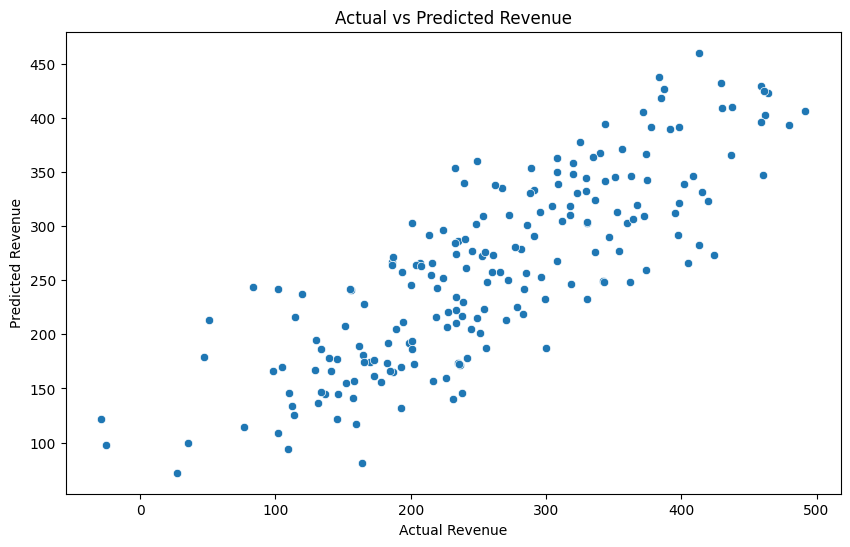

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted revenues
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()
